In [1]:
cd /workspace

/workspace


In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir='./figures/SN/'
sc.settings.set_figure_params(dpi=100, dpi_save=300,fontsize=12, frameon=False, facecolor='white', format='png', color_map='Reds')



In [3]:
print(sc.settings.figdir)

figures/SN


In [4]:
results_file = 'data/multispecies_RAT_SN_clust.h5ad'  # the file that will store the analysis results
pp_file = 'data/multispecies_RAT_SN_pp.h5ad'


In [5]:
adata1 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat5/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata2 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat6_1/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata3 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat6_2/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata4 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat6_3/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata5 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat6_4/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata6 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat10/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata7 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat10_2/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata8 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_hESgraft_rat11/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)

sample_list = ['rat_5','rat_6_1','rat_6_2','rat_6_3','rat_6_4','rat_10_1', 'rat_10_2','rat_11']
hESgraft=adata1.concatenate(adata2,adata3,adata4,adata5,adata6,adata7,adata8, index_unique=None, batch_key="rat", batch_categories=sample_list)

... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat5-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat6_1-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat6_2-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat6_3-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat6_4-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat10-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat10_2-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_hESgraft_rat11-filtered_feature_bc_matrix-matrix.h5ad
Observation names are not unique. To make them unique, call

In [6]:
hESgraft.obs_names_make_unique()
hESgraft

AnnData object with n_obs × n_vars = 10347 × 66421
    obs: 'rat'
    var: 'gene_ids', 'feature_types'

In [7]:
adata1 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_IAS9M_rat14_1/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata2 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_IAS9M_rat14_2/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata3 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_IAS9M_rat14_3/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)
adata4 = sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_IAS9M_rat18_1/filtered_feature_bc_matrix',var_names='gene_symbols', cache=True)

sample_list = ['rat14_1','rat14_2','rat14_3','rat18']
IASM=adata1.concatenate(adata2,adata3,adata4, index_unique=None, batch_key="rat", batch_categories=sample_list)

... reading from cache file cache/data-mtxMultNucleai-Mspecies_IAS9M_rat14_1-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_IAS9M_rat14_2-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_IAS9M_rat14_3-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/data-mtxMultNucleai-Mspecies_IAS9M_rat18_1-filtered_feature_bc_matrix-matrix.h5ad
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [8]:
IASM.obs_names_make_unique()
IASM

AnnData object with n_obs × n_vars = 16451 × 66421
    obs: 'rat'
    var: 'gene_ids', 'feature_types'

In [9]:
ulrich=sc.read_10x_mtx('./data/mtxMultNucleai/Mspecies_Ulrich6M_rat14/filtered_feature_bc_matrix', var_names='gene_symbols', cache=True)
ulrich.obs['rat']='rat14'
ulrich.obs_names_make_unique()
ulrich

... reading from cache file cache/data-mtxMultNucleai-Mspecies_Ulrich6M_rat14-filtered_feature_bc_matrix-matrix.h5ad


AnnData object with n_obs × n_vars = 4000 × 66421
    obs: 'rat'
    var: 'gene_ids', 'feature_types'

In [10]:
sample_list=['ulrich_6M', 'IASM_9M', 'hESgraft_12M' ]
adata = ulrich.concatenate(IASM, hESgraft, index_unique=None, batch_key="sample", batch_categories=sample_list) #Merge the data

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [11]:
adata.obs_names_make_unique()
adata.var_names_make_unique()
adata.var.index.is_unique
adata

/opt/miniconda3/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['ACTATCTTCTATTCGT-1-1', 'ACTATCTTCTATTCGT-1-2', 'ACTATCTTCTATTCGT-1-3', 'ACTATCTTCTATTCGT-1-4', 'ACTATCTTCTATTCGT-1-5']
  + str(example_colliding_values)


AnnData object with n_obs × n_vars = 30798 × 66421
    obs: 'rat', 'sample'
    var: 'gene_ids', 'feature_types'

In [12]:
set(adata.obs['sample'])

{'IASM_9M', 'hESgraft_12M', 'ulrich_6M'}

In [13]:
set(adata.obs['rat'])

{'rat14',
 'rat14_1',
 'rat14_2',
 'rat14_3',
 'rat18',
 'rat_10_1',
 'rat_10_2',
 'rat_11',
 'rat_5',
 'rat_6_1',
 'rat_6_2',
 'rat_6_3',
 'rat_6_4'}

In [14]:
del adata1, adata2,adata3,adata4,adata5, adata6,adata7,adata8,hESgraft, IASM, ulrich


In [15]:
adata.var_names

Index(['premRNAGRCH38_MIR1302-2HG', 'premRNAGRCH38_FAM138A',
       'premRNAGRCH38_OR4F5', 'premRNAGRCH38_AL627309.1',
       'premRNAGRCH38_AL627309.3', 'premRNAGRCH38_AL627309.2',
       'premRNAGRCH38_AL627309.4', 'premRNAGRCH38_AL732372.1',
       'premRNAGRCH38_OR4F29', 'premRNAGRCH38_AC114498.1',
       ...
       'premRNARnor6__AABR07022620.1', 'premRNARnor6__AABR07022674.1',
       'premRNARnor6__AABR07022763.1', 'premRNARnor6__AABR07022303.1',
       'premRNARnor6__AABR07022369.1', 'premRNARnor6__AABR07022926.1',
       'premRNARnor6__AABR07046563.1', 'premRNARnor6__LOC100910067',
       'premRNARnor6__AABR07045682.1', 'premRNARnor6__AABR07046248.1'],
      dtype='object', length=66421)

In [16]:
sum(adata.var_names.str.startswith('premRNAGRCH38_MT-')), sum(adata.var_names.str.startswith('premRNAGRCH38')), sum(adata.var_names.str.startswith('premRNARnor6'))

(13, 33538, 32883)

normalizing counts per cell
    finished (0:00:00)


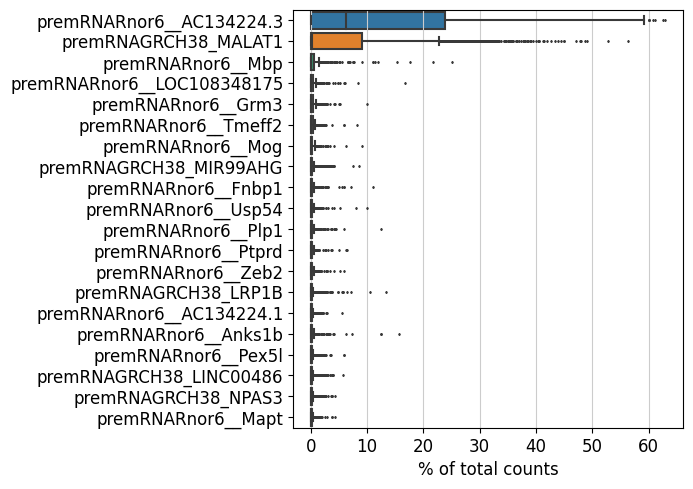

filtered out 2209 cells that have less than 200 genes expressed
/opt/miniconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
filtered out 20600 genes that are detected in less than 5 cells


AnnData object with n_obs × n_vars = 28589 × 45821
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [17]:
sc.pl.highest_expr_genes(adata, n_top=20,save='_Rat_SN' )
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, min_counts=200)
sc.pp.filter_genes(adata, min_cells=5)
adata.var['mt'] = adata.var_names.str.startswith('premRNAGRCH38_MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['human'] = adata.var_names.str.startswith('premRNAGRCH38')  # annotate the group of mitochondrial genes as 'human'
adata.var['rat'] = adata.var_names.str.startswith('premRNARnor6')  # annotate the group of mitochondrial genes as 'rat'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['human'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['rat'], percent_top=None, log1p=False, inplace=True)
adata

In [18]:
adata.obs['pct_counts_rat']

AAACCCAAGCCTATTG-1    98.373444
AAACCCACAACCGCTG-1    98.735176
AAACCCACATGACTAC-1    99.075874
AAACCCAGTGGTTTGT-1    99.215538
AAACCCATCGACTCCT-1    98.716713
                        ...    
TTTGGTTCAGCTATTG-1     0.202511
TTTGGTTCATGTTTGG-1     0.093604
TTTGGTTGTACGAGTG-1     0.156270
TTTGGTTTCCAATCCC-1     0.153304
TTTGTTGCAGGTTCGC-1     0.336134
Name: pct_counts_rat, Length: 28589, dtype: float32

... storing 'rat' as categorical
... storing 'feature_types' as categorical


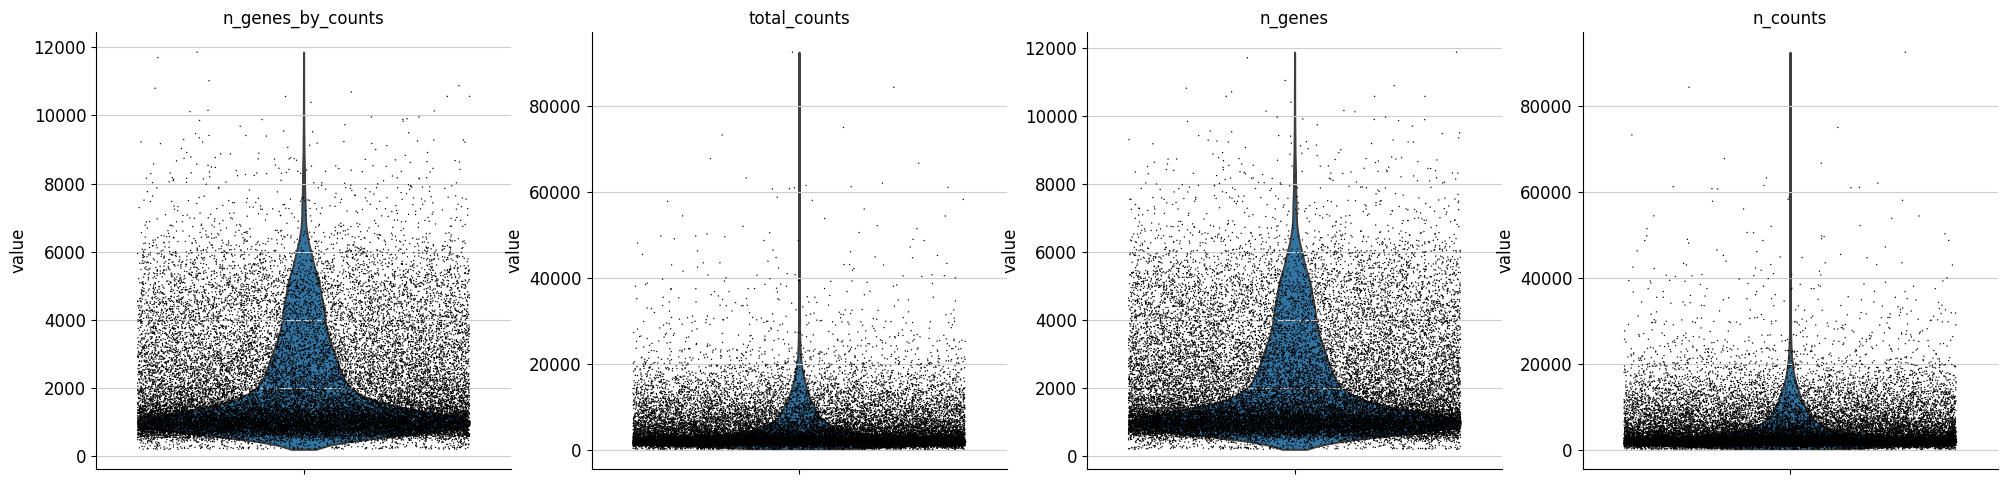

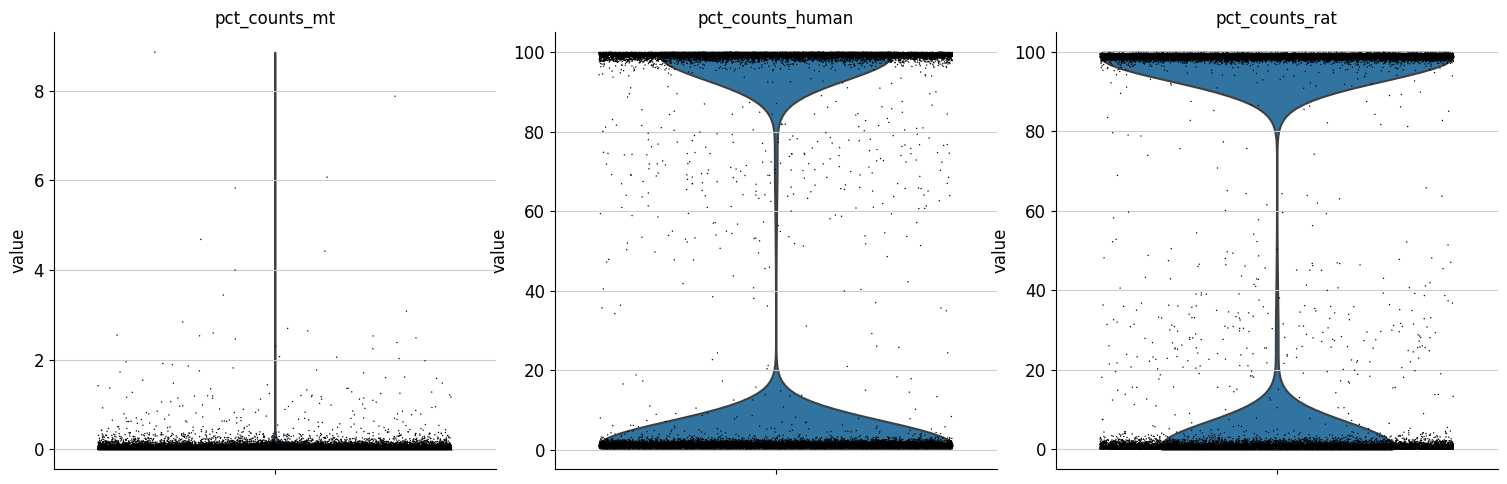

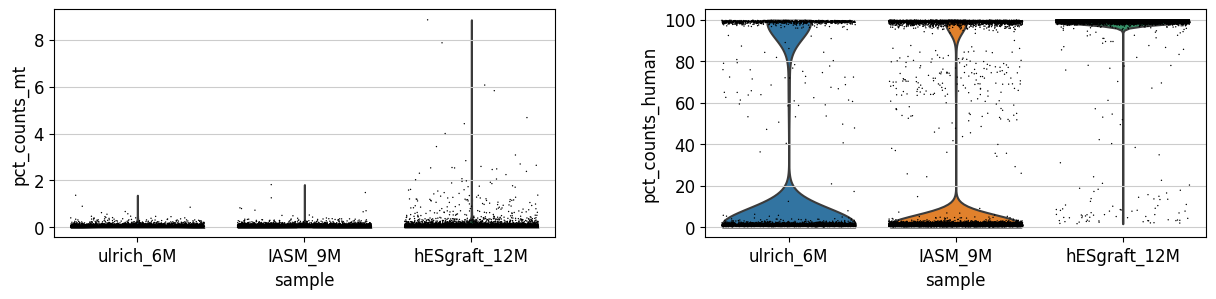

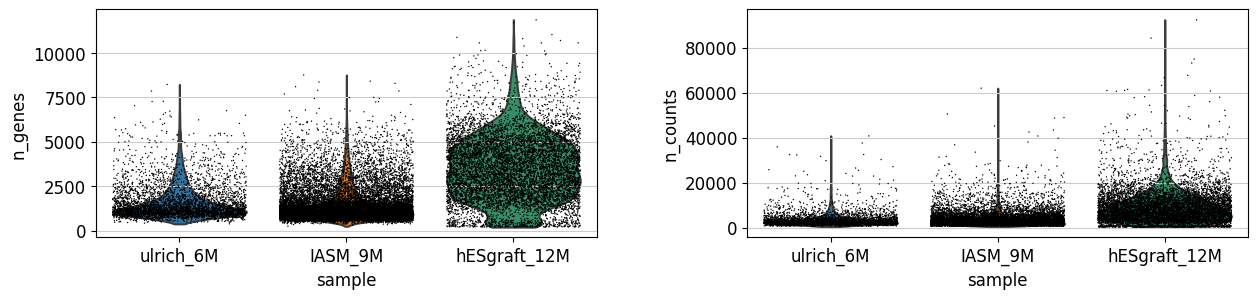

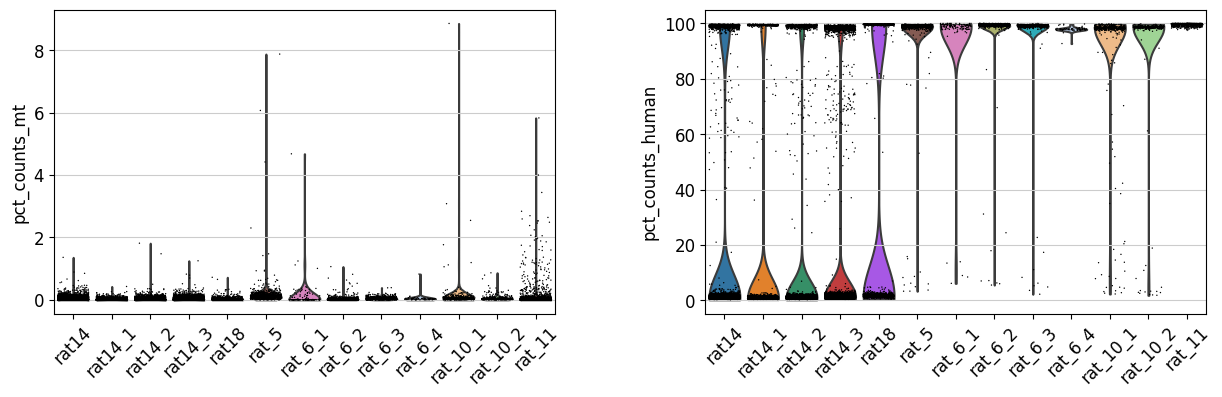

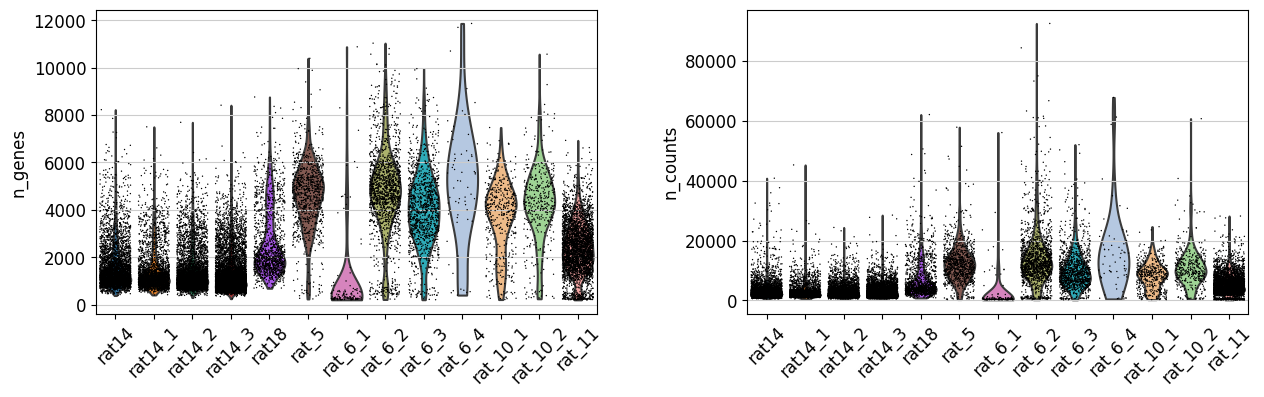

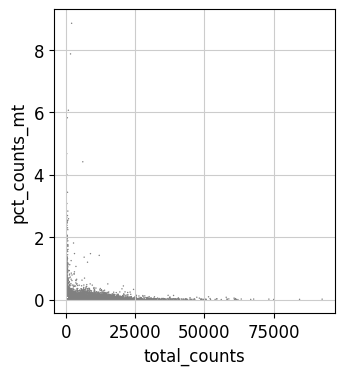

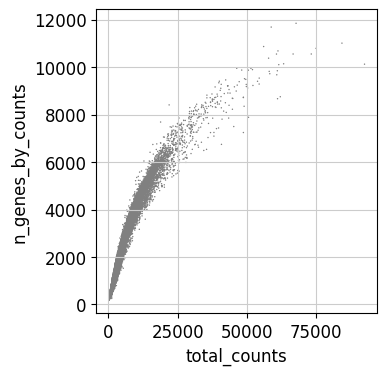

In [19]:
sc.pl.violin(adata, ['n_genes_by_counts','total_counts','n_genes', 'n_counts'], jitter=0.4, multi_panel=True ,save='_nGenes_TotalCounts_Rat_SN')#l;abels do not work with multipanel
sc.pl.violin(adata,['pct_counts_mt', 'pct_counts_human', 'pct_counts_rat'], jitter=0.4, multi_panel=True, save= '_pct_mit_human_rat_SN')
with rc_context({'figure.figsize': (6, 3)}):
    sc.pl.violin(adata,['pct_counts_mt','pct_counts_human'],groupby='sample',jitter=0.4, multi_panel=True, save= '_pcts_sample_SN')
    sc.pl.violin(adata,[ 'n_genes','n_counts'],groupby='sample',jitter=0.4, multi_panel=True, save= '_counts_sample_SN')
with rc_context({'figure.figsize': (6, 4)}):
    sc.pl.violin(adata,['pct_counts_mt','pct_counts_human'],groupby='rat',rotation=45, jitter=0.4, multi_panel=True, save= '_pcts_rat_SN')
    sc.pl.violin(adata,[ 'n_genes','n_counts'],groupby='rat',rotation=45, jitter=0.4, multi_panel=True, save= '_counts_rat_SN')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',save='_pctMT_total_countsRat_SN' ) #Cut under 10% mit
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',save='_total_genes_by_counts_Rat_SN') # cut under 5000 genes by counts

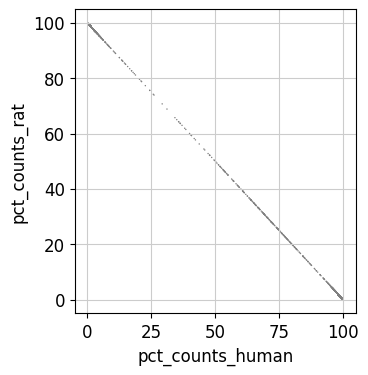

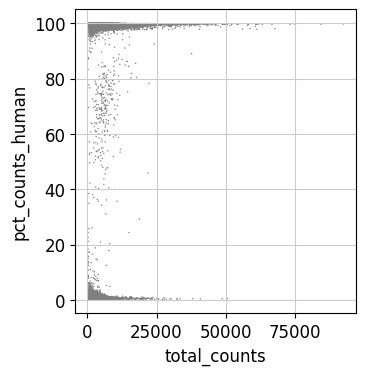

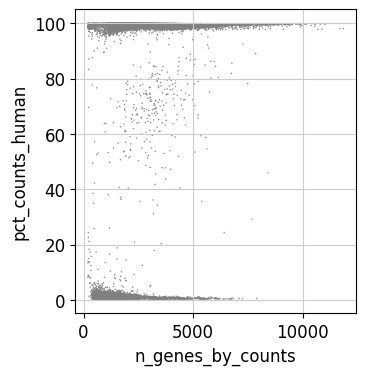

In [20]:
sc.pl.scatter(adata, x='pct_counts_human', y='pct_counts_rat',save='_pct_humanVRat_SN')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_human',save= '_total_pctHuman_SN')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_human', save='_gnesbyCounts_pctHuman_SN')

In [21]:
adata

AnnData object with n_obs × n_vars = 28589 × 45821
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors', 'rat_colors'

In [22]:
adata = adata[adata.obs.n_genes_by_counts < 4000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/miniconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [23]:
adata =adata[adata.obs.pct_counts_rat > 90, : ]

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [24]:
adata.obs['species'] = 'rat'

Trying to set attribute `.obs` of view, copying.


In [25]:
adata

AnnData object with n_obs × n_vars = 16815 × 45821
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat', 'species'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors', 'rat_colors'

In [26]:
new_vars=[]
print(len(adata.var_names))
for gene in adata.var_names:
    new_varname = gene.split('_',1)[1]
    if new_varname.startswith('_'):
        new_vars.append(new_varname.split('_',1)[1])
    else :
        new_vars.append(new_varname)
print(len(new_vars))

45821
45821


In [27]:
adata.var['Orig_VarNames'] = adata.var_names
adata.var['New_VarNames'] = new_vars
adata.var_names = new_vars
adata

AnnData object with n_obs × n_vars = 16815 × 45821
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat', 'species'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'Orig_VarNames', 'New_VarNames'
    uns: 'sample_colors', 'rat_colors'

In [28]:
sc.pp.normalize_total(adata, target_sum=1e4)


normalizing counts per cell
    finished (0:00:00)


In [29]:
sc.pp.log1p(adata)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


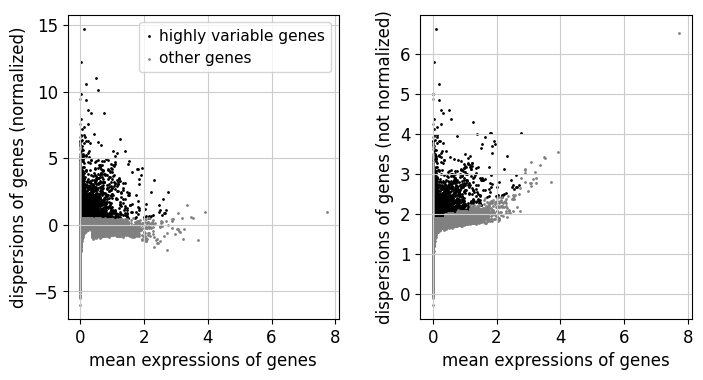

In [30]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata, save='_highly_variable_rat_SN')

In [31]:
adata.var_names_make_unique()
adata.raw = adata

In [32]:
adata = adata[:, adata.var.highly_variable]

In [33]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
/opt/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'species' as categorical
    finished (0:01:02)


In [34]:
sc.pp.scale(adata, max_value=10)

In [35]:
adata

AnnData object with n_obs × n_vars = 16815 × 3064
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat', 'species'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'Orig_VarNames', 'New_VarNames', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'sample_colors', 'rat_colors', 'log1p', 'hvg'

In [36]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
/opt/miniconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=50
    finished (0:00:05)


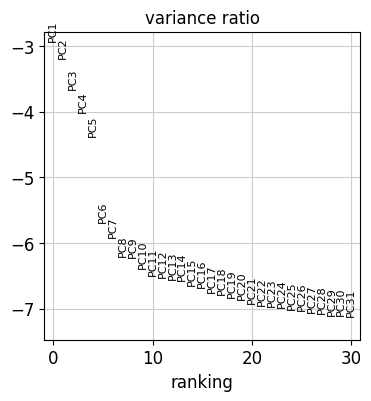

In [37]:
sc.pl.pca_variance_ratio(adata, log=True, save='_PCA_rat_SN')

In [38]:
adata.write(results_file)
adatapp=adata.copy()

... storing 'New_VarNames' as categorical


In [39]:
#Compute neighborhood graph 
sc.pp.neighbors(adata, n_neighbors=100, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:39)


In [40]:
sc.tl.leiden(adata, resolution= 0.20, key_added='leiden_0.20')
#sc.tl.louvain(adata, resolution= 0.3, key_added='louvain0.3')

running Leiden clustering
    finished: found 7 clusters and added
    'leiden_0.20', the cluster labels (adata.obs, categorical) (0:00:04)


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


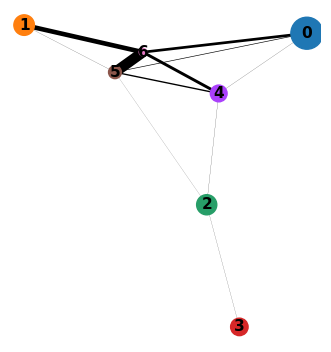

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


In [41]:
# Embed it
#Prevent cluster rules vilations
#sc.tl.paga(adata,groups='louvain0.3')
#sc.pl.paga(adata)  # remove `plot=False` if you want to see the coarse-grained graph
#sc.tl.umap(adata, init_pos='paga')
sc.tl.paga(adata,groups='leiden_0.20')
sc.pl.paga(adata,save='_Paga_cpnectivities_SN')  # remove `plot=False` if you want to see the coarse-g
sc.tl.umap(adata, init_pos='paga', n_components=3, min_dist= 0.5)

In [42]:
adata

AnnData object with n_obs × n_vars = 16815 × 3064
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat', 'species', 'leiden_0.20'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'Orig_VarNames', 'New_VarNames', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'sample_colors', 'rat_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_0.20_sizes', 'leiden_0.20_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [43]:
adata.obsm['X_umap']#Its not computing the 3rd dimension

array([[14.49048  , 11.033934 ],
       [11.136249 ,  7.6983633],
       [ 8.643662 ,  8.865704 ],
       ...,
       [13.570611 , 12.458147 ],
       [10.5440235, -3.5419989],
       [11.226662 ,  8.63919  ]], dtype=float32)

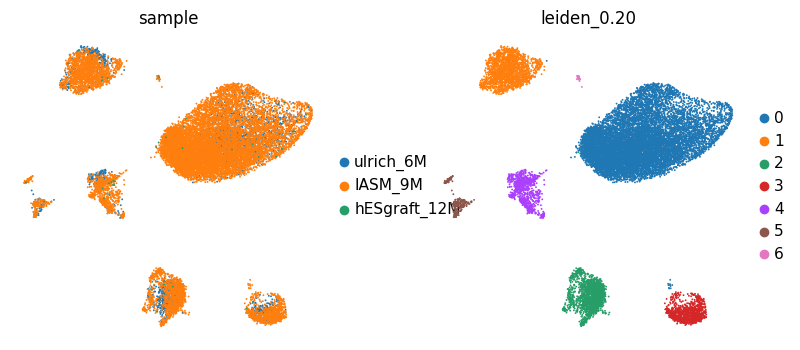

In [44]:
sc.pl.umap(adata, color=['sample', 'leiden_0.20'])

In [45]:
adata
adata.obs['clusters']=adata.obs['leiden_0.20']

In [46]:
markerdict={
'Neural progenitors' : ['NES', 'Sox2', 'Sox9'],
'Neurogenesis' : ['HES1','HES5','NEUROG2'],
'Neurons' : ['Map2','Gap43','NSG2','SNAP25','TH','Gad1','Gad2','Slc17a6'],
'Astrocytes' : ['Gfap','Aqp4', 'Itih3','Slc1a3'],
'Microglia' : ['Cx3cr1','Lyn', 'Arhgap15'],
'Fibroblast' : ['Col18a1'],
'Oligodendrocytes' : ['Olig1','Olig2','PMP2','Sox10'],
'Endothelial' : ['Ebf1','ICAM1']}


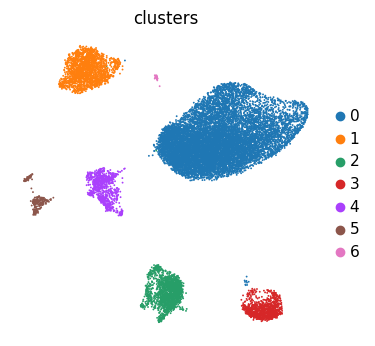

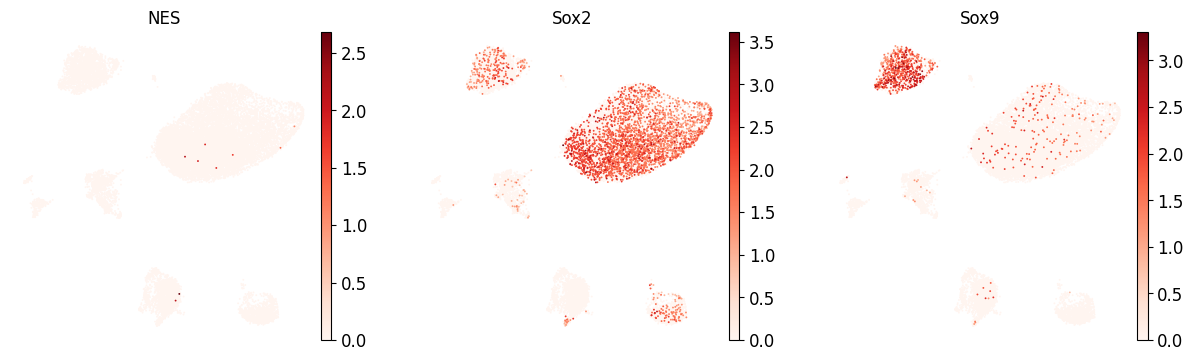

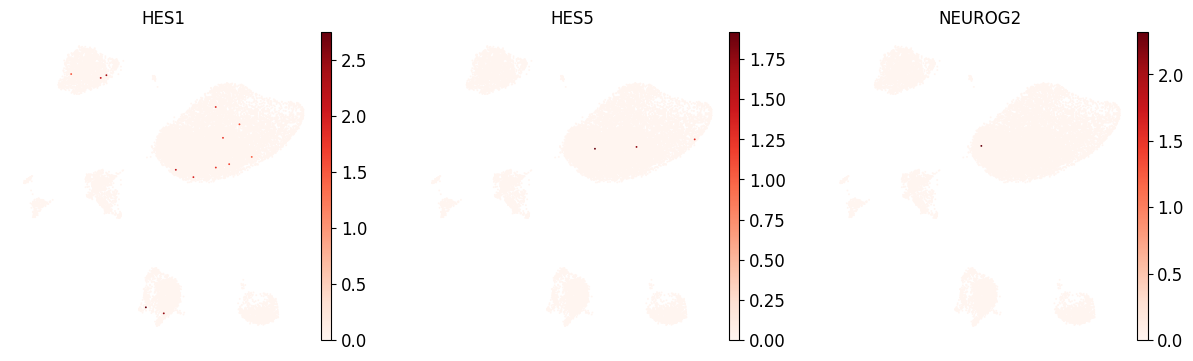

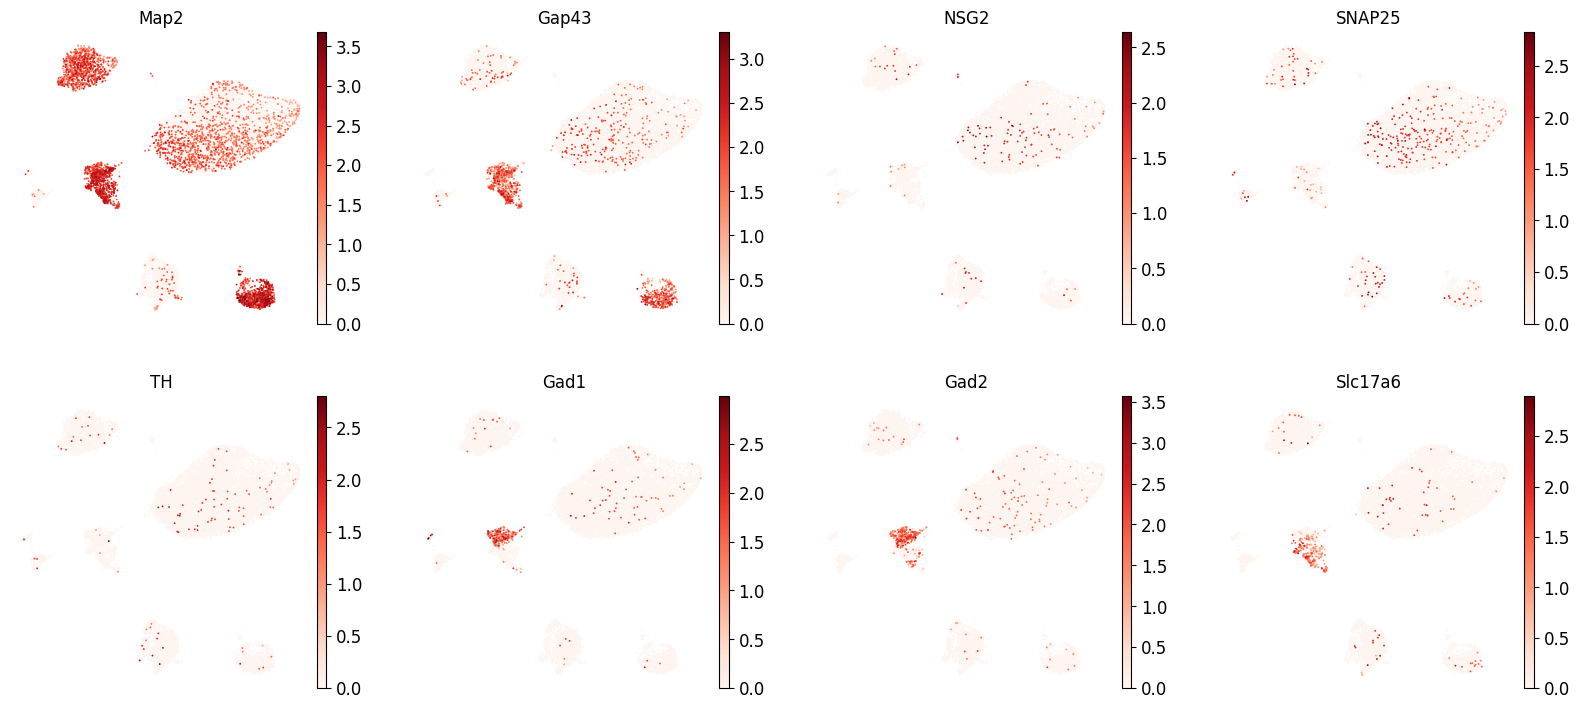

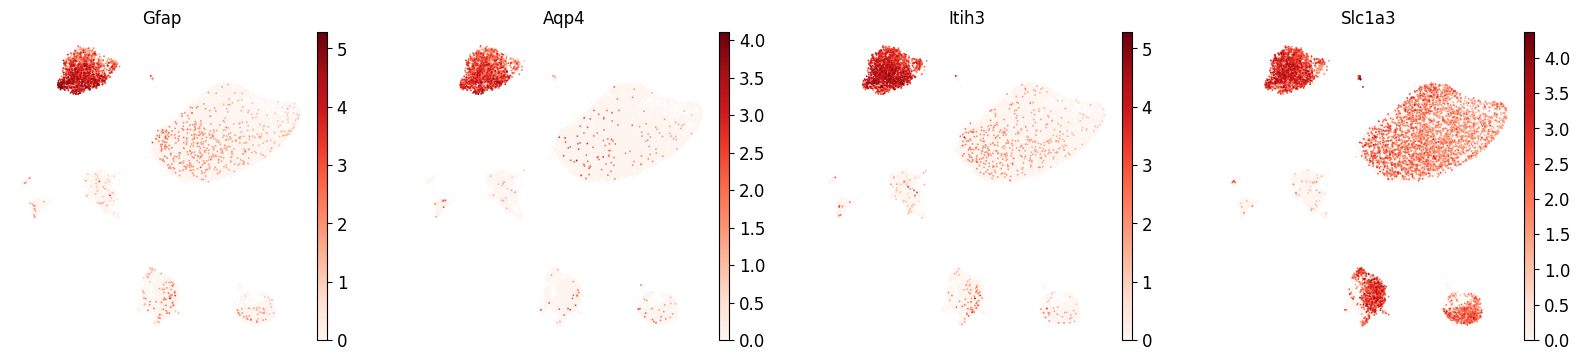

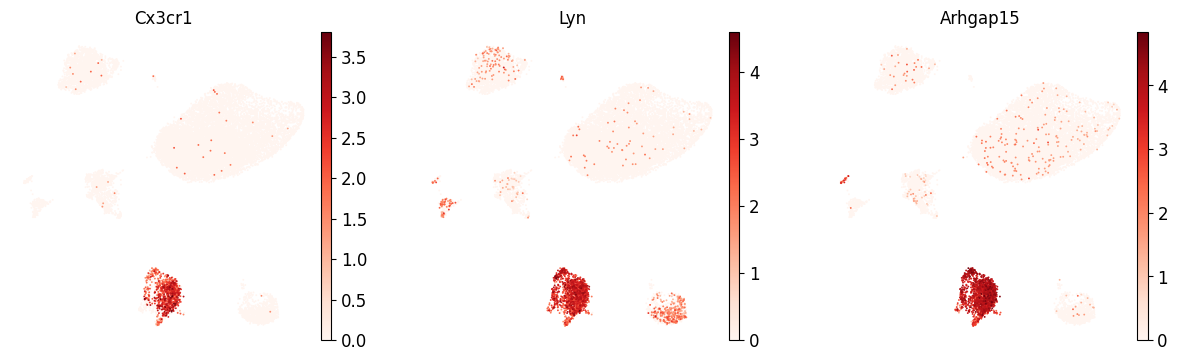

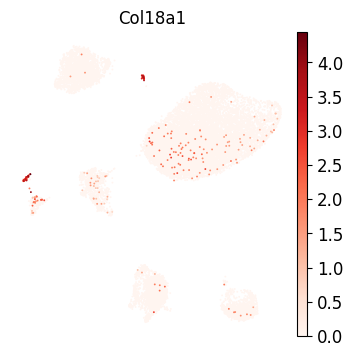

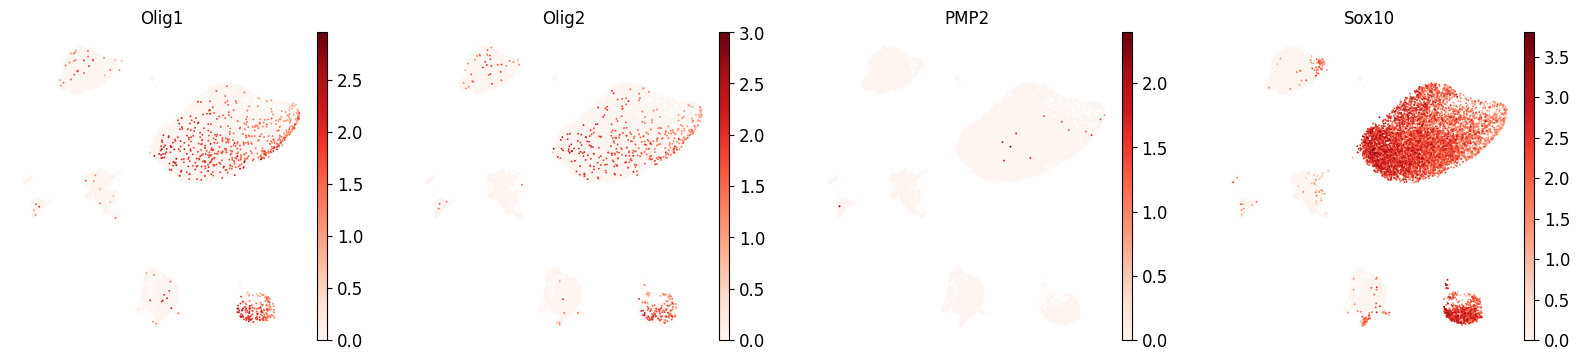

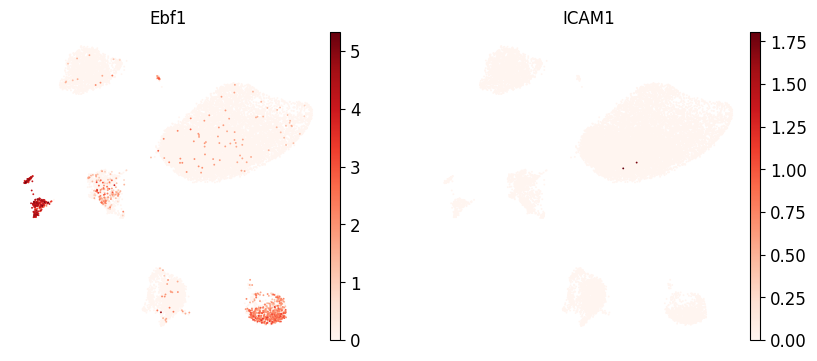

In [47]:
sc.pl.umap(adata, color = ['clusters'],save='_clust_0.20_Rat_SN')

for key in markerdict:
    strsave='_'+key+'_SN'
    sc.pl.umap(adata, color = markerdict[key],save = strsave)

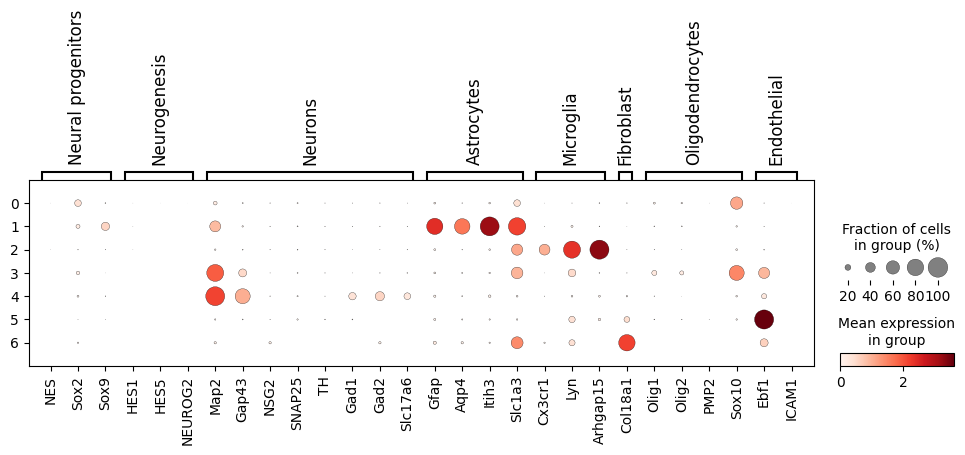

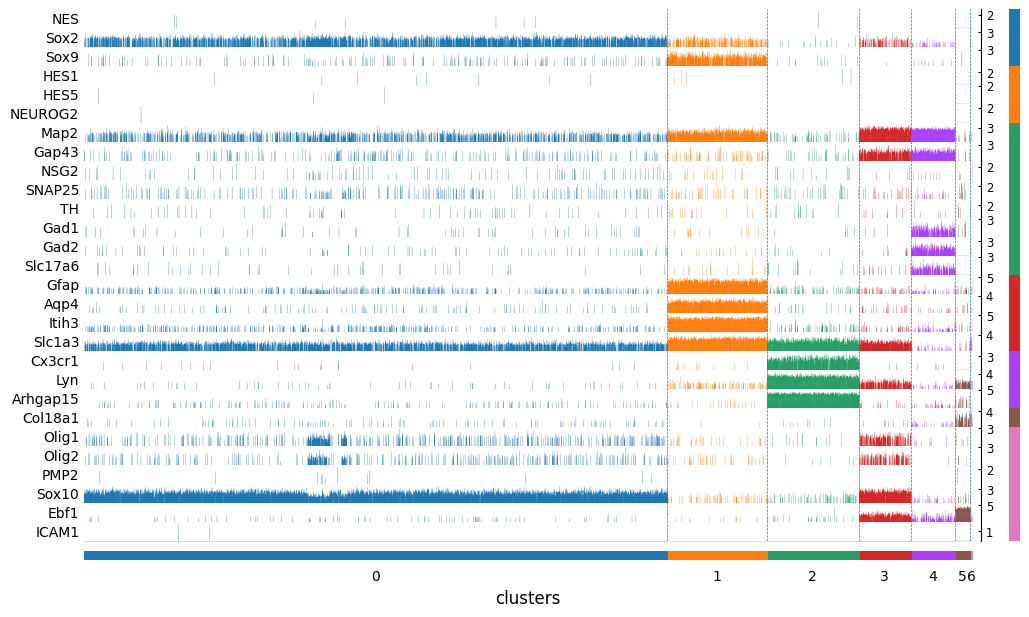

In [48]:
sc.pl.dotplot(adata, markerdict, 'clusters', dendrogram=False)
sc.pl.tracksplot(adata, markerdict, groupby='clusters', dendrogram=False)

In [49]:
sc.tl.rank_genes_groups(adata,'leiden_0.20', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:44)


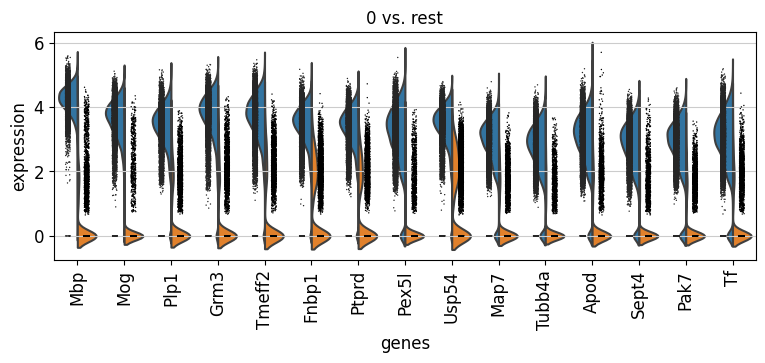

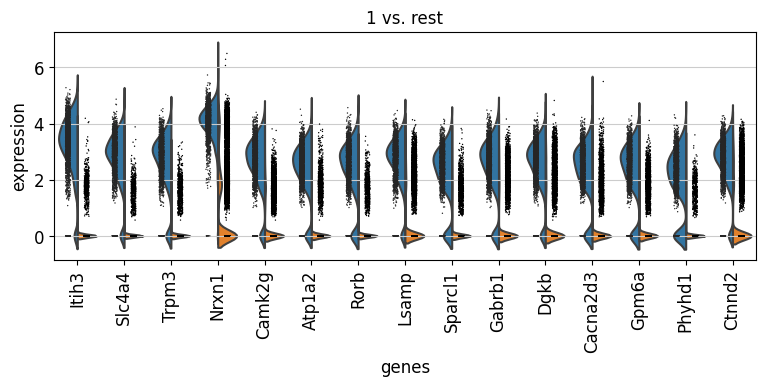

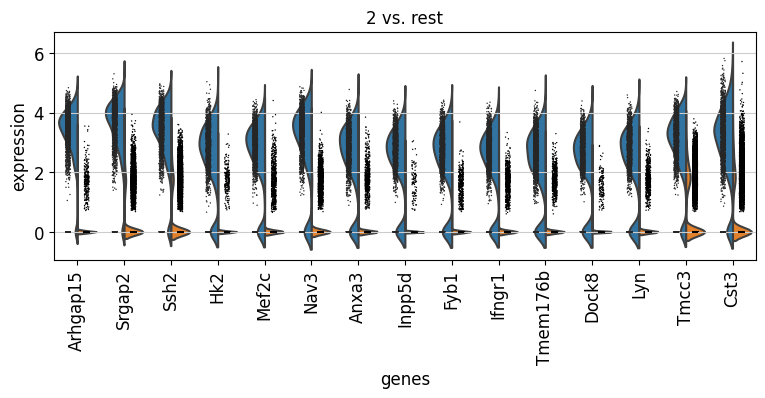

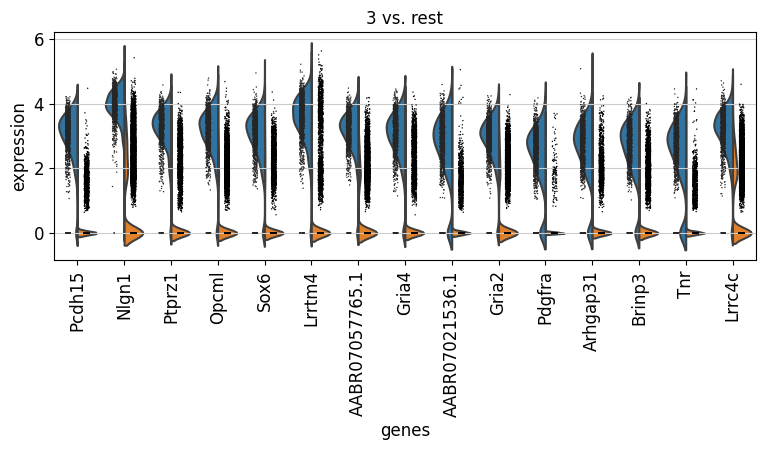

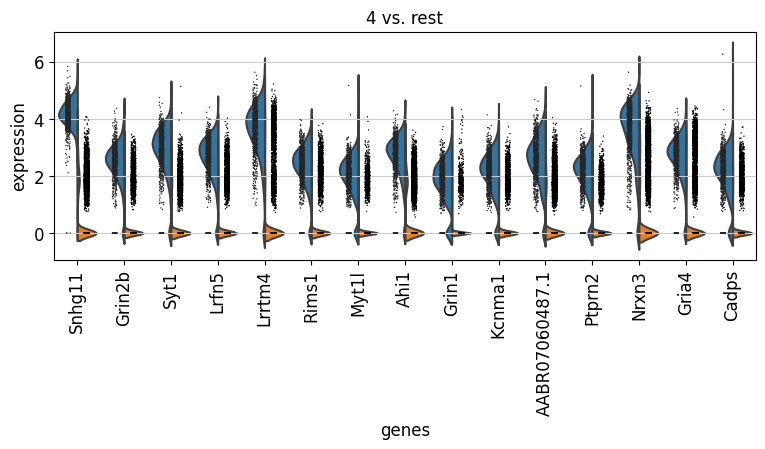

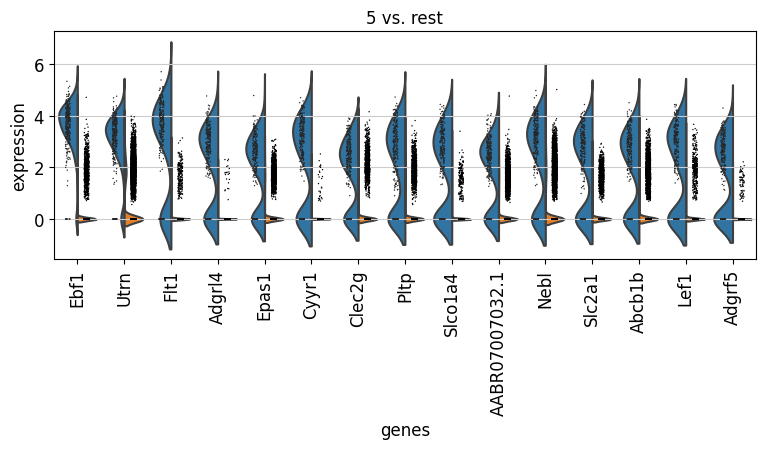

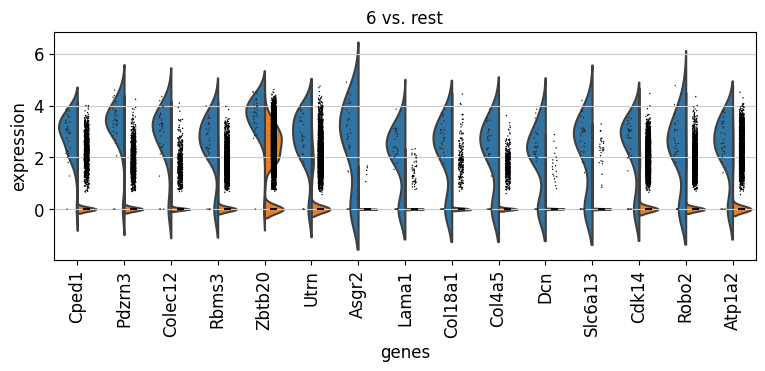

In [50]:
with rc_context({'figure.figsize': (9, 3)}):
    sc.pl.rank_genes_groups_violin(adata, n_genes=15, save= '_rank_genes_SN')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.20']`


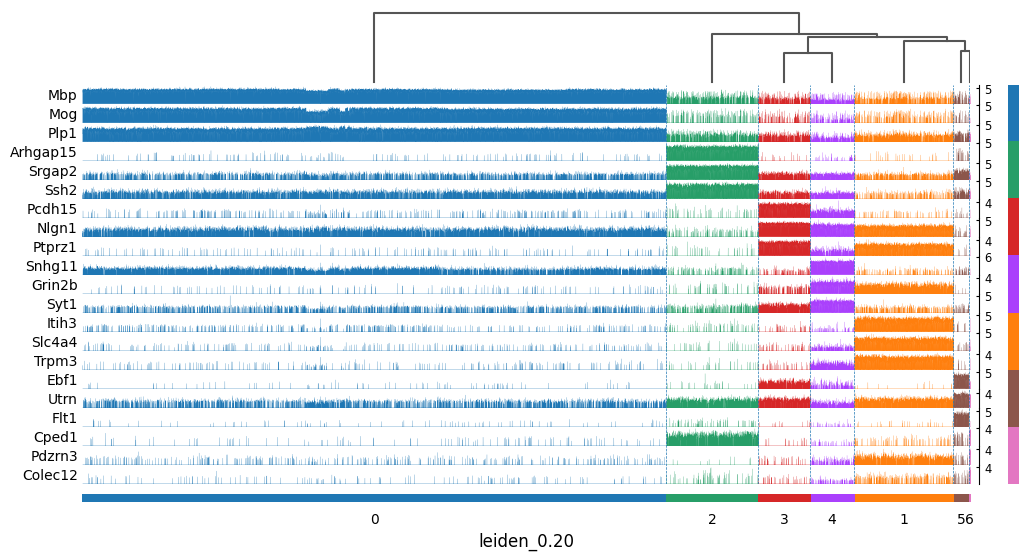

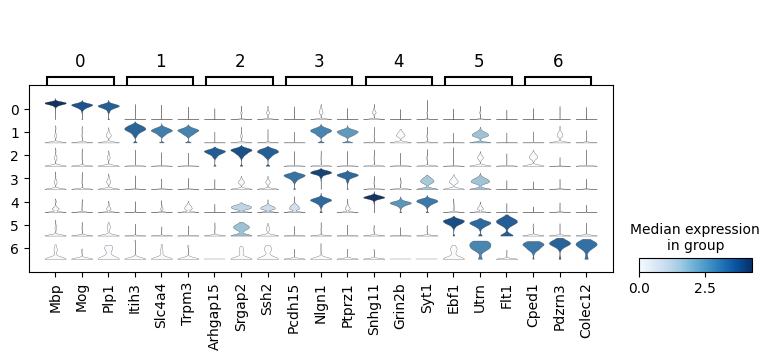

In [51]:
sc.pl.rank_genes_groups_tracksplot(adata, n_genes=3, save='rankGenes_SN')
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=3,dendrogram=False, save='rankGenes_violin_SN')

In [52]:
new_cluster_names = ['Oligodendrocytes', 'Astrocytes','Microglia','Neurons_1','Neurons_2','Endothelial','Fibroblast' ]
long_cluster_names = ['Oligodendrocytes', 'Astrocytes','Microglia','Glutamatergic Neurons','Gabaergic Neurons','Endothelial','Fibroblast']
adata.obs['clusters'] = adata.obs['leiden_0.20']
adata.rename_categories('leiden_0.20', new_cluster_names)
adata.obs['cell_types']=adata.obs['leiden_0.20']
adata.rename_categories('leiden_0.20', long_cluster_names)
adata.obs['cell_types_long']=adata.obs['leiden_0.20']

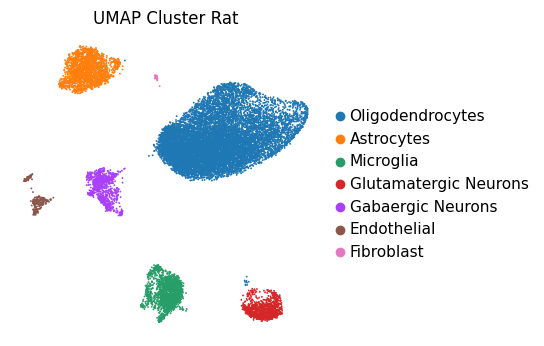

In [53]:
sc.pl.umap(adata, color='cell_types_long', legend_loc='right margin', title='UMAP Cluster Rat',frameon=False, save='UMAP_Rat2D_SN.pdf')
#sc.pl.umap(adata, color='leiden0.2', legend_loc='right margin', title='UMAP cluster Rat 3D',projection = '3d',frameon=False, save='.pdf')

In [85]:
df0=pd.crosstab(adata.obs['cell_types_long'],adata.obs['sample']).apply(lambda r: r/r.sum(), axis=0)*100
df0

sample                 ulrich_6M    IASM_9M  hESgraft_12M
cell_types_long                                          
Oligodendrocytes       56.960276  67.639850     41.666667
Astrocytes             12.469775  10.892445     14.583333
Microglia              16.200345   9.133506     12.500000
Glutamatergic Neurons   7.461140   5.529123      4.166667
Gabaergic Neurons       4.421416   5.017301     20.833333
Endothelial             2.279793   1.600346      4.166667
Fibroblast              0.207254   0.187428      2.083333

In [86]:
df=pd.crosstab(adata.obs['sample'],adata.obs['cell_types_long']).apply(lambda r: r/r.sum(), axis=1)*100
df

cell_types_long  Oligodendrocytes  Astrocytes  Microglia  \
sample                                                     
ulrich_6M               56.960276   12.469775  16.200345   
IASM_9M                 67.639850   10.892445   9.133506   
hESgraft_12M            41.666667   14.583333  12.500000   

cell_types_long  Glutamatergic Neurons  Gabaergic Neurons  Endothelial  \
sample                                                                   
ulrich_6M                     7.461140           4.421416     2.279793   
IASM_9M                       5.529123           5.017301     1.600346   
hESgraft_12M                  4.166667          20.833333     4.166667   

cell_types_long  Fibroblast  
sample                       
ulrich_6M          0.207254  
IASM_9M            0.187428  
hESgraft_12M       2.083333

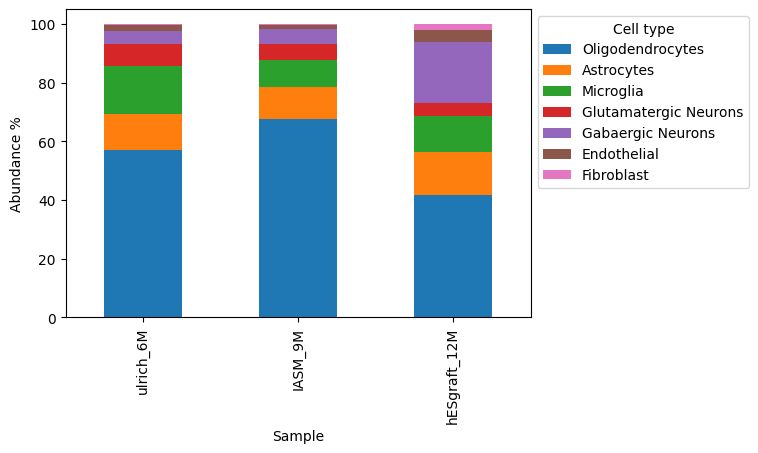

In [90]:
with plt.style.context('default'):
    ax = df.plot(kind='bar', stacked=True, figsize=(6, 4))
    ax.set_ylabel('Abundance %')
    ax.set_xlabel('Sample')
    plt.legend(title='Cell type', bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.savefig('./figures/SN/Cell_type_stacked.png')  # if needed
    plt.show()

In [55]:
adata

AnnData object with n_obs × n_vars = 16815 × 3064
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat', 'species', 'leiden_0.20', 'clusters', 'cell_types', 'cell_types_long'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'Orig_VarNames', 'New_VarNames', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'sample_colors', 'rat_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_0.20_sizes', 'leiden_0.20_colors', 'umap', 'clusters_colors', 'rank_genes_groups', 'dendrogram_leiden_0.20', 'cell_types_long_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

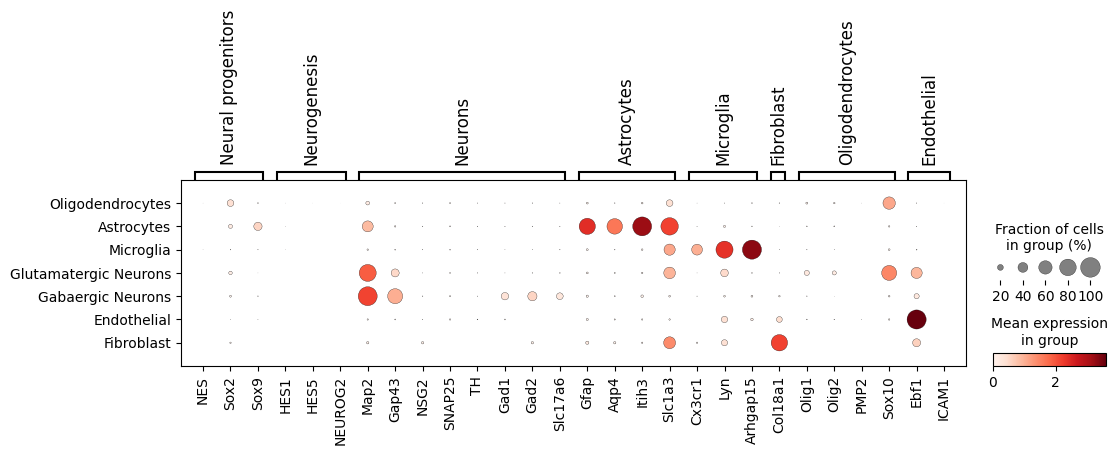

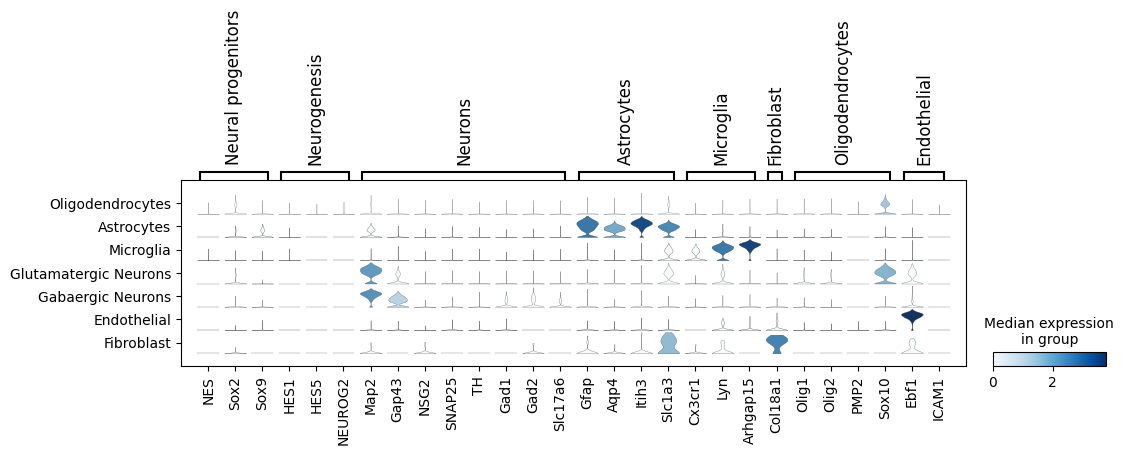

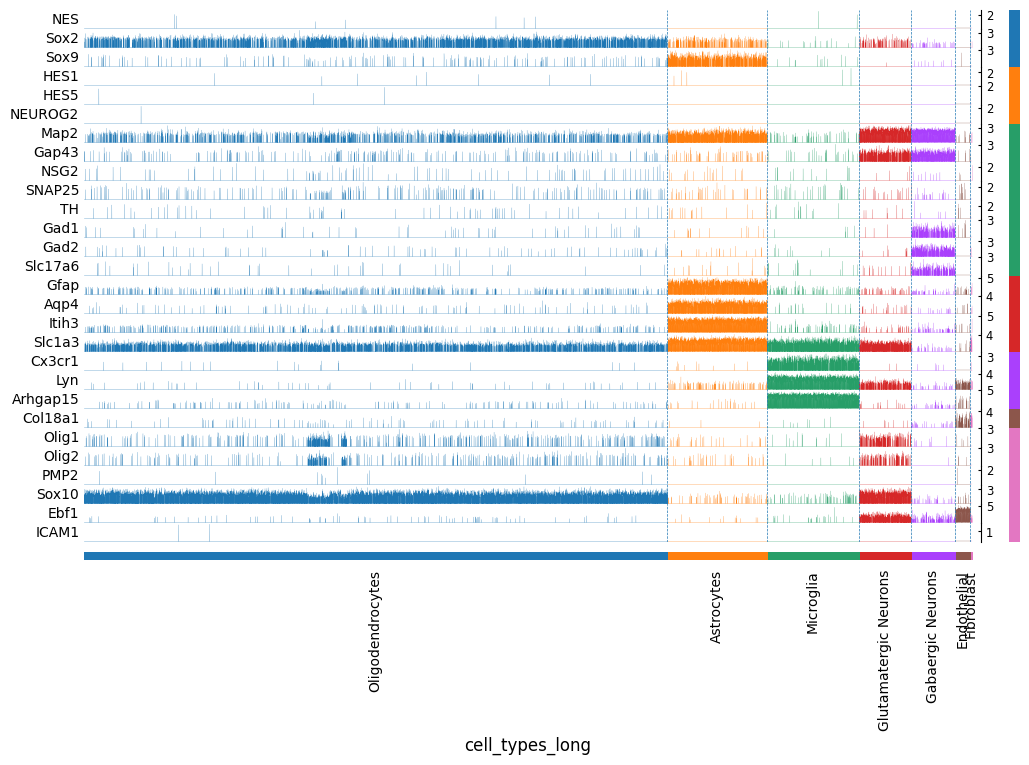

In [56]:
sc.pl.dotplot(adata, markerdict, groupby='cell_types_long', save='_CellMarker_SN')
sc.pl.stacked_violin(adata, markerdict, groupby='cell_types_long', rotation=90, save='_cellmarker_SN')
sc.pl.tracksplot(adata, markerdict, groupby='cell_types_long', dendrogram=False, save= 'Cellmarker_track_SN')

In [57]:
set(adata.obs['leiden_0.20'])

{'Astrocytes',
 'Endothelial',
 'Fibroblast',
 'Gabaergic Neurons',
 'Glutamatergic Neurons',
 'Microglia',
 'Oligodendrocytes'}

In [58]:
adatapp.obs['cell_types']=adata.obs['leiden_0.20']

In [59]:
adatapp.obs.drop(adatapp.obs.columns.difference(['sample','cell_types']), 1, inplace=True)
adatapp.var.drop(adatapp.var.columns.difference(['gene_ids','Orig_VarNames']), 1, inplace=True)
del adatapp.obsm, adatapp.uns, adatapp.varm, adatapp.obsp

In [60]:
adatapp

AnnData object with n_obs × n_vars = 16815 × 3064
    obs: 'sample', 'cell_types'
    var: 'gene_ids', 'Orig_VarNames'

In [61]:
adata

AnnData object with n_obs × n_vars = 16815 × 3064
    obs: 'rat', 'sample', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_rat', 'pct_counts_rat', 'species', 'leiden_0.20', 'clusters', 'cell_types', 'cell_types_long'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'rat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'Orig_VarNames', 'New_VarNames', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'sample_colors', 'rat_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_0.20_sizes', 'leiden_0.20_colors', 'umap', 'clusters_colors', 'rank_genes_groups', 'dendrogram_leiden_0.20', 'cell_types_long_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [62]:
adata.write(results_file)
adatapp.write(pp_file)